<a href="https://colab.research.google.com/github/Asvataman/Solving-PDEs/blob/master/MP_Neuron_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

## Loading Data

In [1]:
import sklearn.datasets                                                         #contains datasets of few common examples and tools to generate data which is used for understanding ML 
import numpy as np
import pandas as pd

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [3]:
print(X)
print(Y)
print(X.shape, Y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

539 data points and each data contains 30 different features

In [4]:
data = pd.DataFrame(breast_cancer.data , columns= breast_cancer.feature_names)       #Loading data as DataFrame (pandas have easier data processing functions)
data['is_cancer_positive'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer_positive
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,is_cancer_positive
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
print(data['is_cancer_positive'].value_counts())                                #To see how the data is biased. This data contains more positve cases than negative

1    357
0    212
Name: is_cancer_positive, dtype: int64


In [7]:
data.groupby('is_cancer_positive').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
is_cancer_positive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


## Train and Test Spilt

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('is_cancer_positive', axis = 1)                                   # Creates X (Input data) with the output column removed
Y = data['is_cancer_positive']                                                  # Creates Y (Output data) as 'is_cancer_positve' column

In [10]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_cancer_positive, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)                        #spliting data as training and test data

In [13]:
print(X.shape, X_train.shape, Y.shape, Y_train.shape)

(569, 30) (426, 30) (569,) (426,)


This above function splits the data randomly each time. But this is not desired as we need same Train and Test data when we reproduce this. To get same data split everytime set the random_state to a constant.( Each Randomness has a state in computer).

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)  #it can be any integer

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1)         #By default test_size = o.1

In [15]:
print(X.shape, X_train.shape, Y.shape, Y_train.shape)                           #As we have used the same spliting ratio as the default the is no change in dimension 

(569, 30) (512, 30) (569,) (512,)


In [16]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.630859375 0.5964912280701754


***As we can see the mean of test and train is not close to the mean of original data. If they vary largely(+/- 0.3) use the following***


    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, stratify = Y)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, stratify = Y, random_state = 1)

In [18]:
print(Y.mean(), Y_train.mean(), Y_test.mean())                                  # Note that the mean of the data splited resembles the original data            

0.6274165202108963 0.6277777777777778 0.6206896551724138


# **MP Neuron**

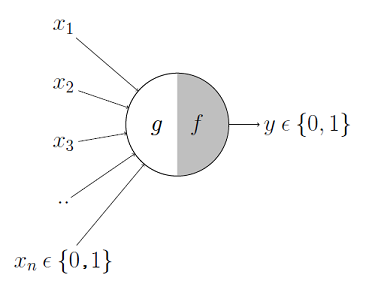

$$ g(x_1, x_2, x_3, ....., x_n) = g(X) = \sum_{i=1}^{n}x_i \hspace{.5cm} ,x \hspace{.25cm}\epsilon\hspace{.25cm} \{0,1\}$$

$ y =  1 \hspace{.5cm}if\hspace{.5cm}g(x) \geq b $

$y = 0\hspace{.5cm}if \hspace{.5cm}g(x)<b $

$where \hspace{.25cm} b\hspace{.25cm} \epsilon\hspace{.25cm}[0, n] $

We need to learn the optimal value of $b$

## Binarisation
    

**The data given is in real numbers or Strings, whereas MP Neuron takes only BOOLEAN values( 0 or 1) as input. Converting or Transforming data to binary form is Binarisation.**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


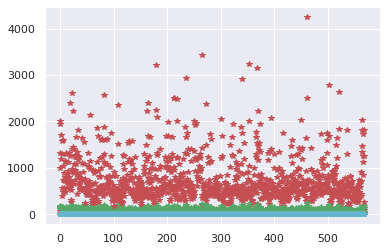

In [20]:
sns.set()
plt.plot(X_train,'*')
plt.show()                                        

As this graph is not easy to visualise. Let us Plot X transpose to see feature wise  variation

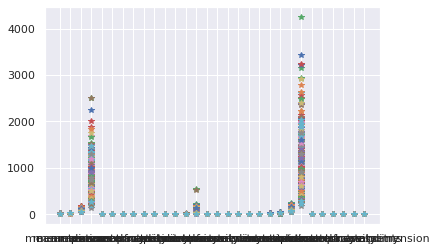

In [21]:
plt.plot(X_train.T,'*')
plt.show()    

The lables in x axis are overlapped. Lets  Fix that

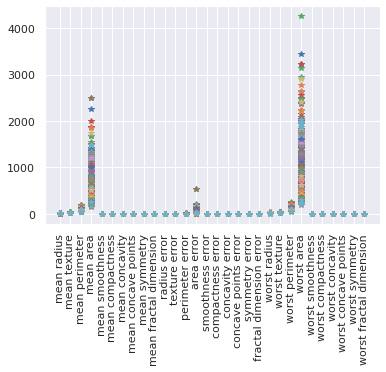

In [22]:
plt.plot(X_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()    

We can see that the columns take range of values. We binarise it with mean of the data i.e. set it 1 if more than mean , to 0 when less than or equal to mean

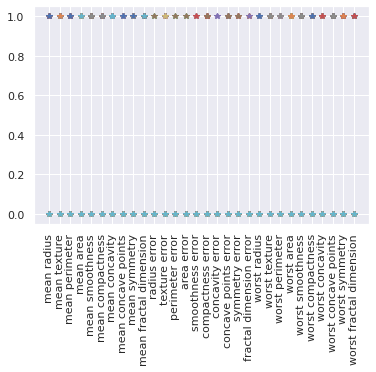

In [23]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [0,1])
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation = 'vertical')
plt.show()    

In [24]:
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [0,1])     
type(X_binarised_train)           # Binarising Test data

pandas.core.frame.DataFrame

We will convert it back to numpy array as we have completed data processing

In [25]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values
print(type(X_binarised_train), type(X_binarised_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## MP Neuron

In [26]:
for b in range(X_binarised_train.shape[1] + 1):                                 # b ϵ [0,n]
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)                                                   # Calculating prediction as sum of all x values in a row
    Y_pred_train.append(y_pred)                                                 # Appending it to y Predection
    accurate_rows += (y == y_pred)                                              # Calculating number of accurate predictions

  print(b, accurate_rows/X_binarised_train.shape[0])  

0 0.6277777777777778
1 0.24074074074074073
2 0.1814814814814815
3 0.15
4 0.15185185185185185
5 0.1685185185185185
6 0.2
7 0.23148148148148148
8 0.26296296296296295
9 0.29259259259259257
10 0.3111111111111111
11 0.3296296296296296
12 0.3388888888888889
13 0.3425925925925926
14 0.35185185185185186
15 0.35555555555555557
16 0.36666666666666664
17 0.3685185185185185
18 0.37037037037037035
19 0.37222222222222223
20 0.37222222222222223
21 0.37222222222222223
22 0.37222222222222223
23 0.37222222222222223
24 0.37222222222222223
25 0.37222222222222223
26 0.37222222222222223
27 0.37222222222222223
28 0.37222222222222223
29 0.37222222222222223
30 0.37222222222222223


The accuracy is high when b is zero. That means when we predict it as positive always we get better results. This is because of two reasons:

1. The number of positive cases is high in the data

2. The x takes Larger value when it is negative. But in our binarisation we assign x to be 1 when it is larger. As MP neuron does not have weight as feature and b cannot be negative. We face this issue.

We can correct this by binarising lower values as 1 and larger values as 0

In [27]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels = [1,0])             # Note that the labels are changed as [1,0]
X_binarised_test = X_test.apply(pd.cut, bins = 2, labels = [1,0])  
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [28]:
for b in range(X_binarised_train.shape[1] + 1):                                 # b ϵ [0,n]
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)                                                   # Calculating prediction as sum of all x values in a row
    Y_pred_train.append(y_pred)                                                 # Appending it to y Predection
    accurate_rows += (y == y_pred)                                              # Calculating number of accurate predictions

  print(b, accurate_rows/X_binarised_train.shape[0])  

0 0.6277777777777778
1 0.6277777777777778
2 0.6277777777777778
3 0.6277777777777778
4 0.6277777777777778
5 0.6277777777777778
6 0.6277777777777778
7 0.6277777777777778
8 0.6277777777777778
9 0.6277777777777778
10 0.6277777777777778
11 0.6277777777777778
12 0.6277777777777778
13 0.6296296296296297
14 0.6314814814814815
15 0.6333333333333333
16 0.6444444444444445
17 0.6481481481481481
18 0.6574074074074074
19 0.6611111111111111
20 0.6703703703703704
21 0.6888888888888889
22 0.7074074074074074
23 0.737037037037037
24 0.7685185185185185
25 0.8
26 0.8314814814814815
27 0.8481481481481481
28 0.85
29 0.8185185185185185
30 0.7592592592592593


Now we can see that when b is 28 we have maximum accuracy. But this accuracy is in train data. To check that it is consistent we need to check  with the test data

And let us use sklearns accuracy function

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
b = 28                                                                          # b = 28
Y_pred_test = []                                                                # Note that we are working on test data

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)                                                     # Calculating prediction as sum of all x values in a row
  Y_pred_test.append(y_pred)                                                    # Appending it to y Predection
                                                                                # Calculating number of accurate predictions
accuracy = accuracy_score(Y_pred_test, Y_test)
print(accuracy)  

0.7586206896551724


We can see that the accuracy is less when we predict on test data. Note that there maybe a 'b' value for which the accuracy is higher in the test data. But that is out of our control. We test on the training data and evaluvate its accuracy on the test data

## MP neuron class

In [31]:
class MPNeuron:

  def __init__(self):                           # init is initialisation function, it is with two underscores , self sends the assignment variable(a = fun()...self passes a to the function)
    self.b = None

  def model(self, x):
    return(sum(x) >= self.b)                    # Function which returns 1 if it is greater than b 0 otherwise

  def predict(self, X):                         # Function to pridict the Y 
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y):                          # Function to find the best value of b
    accuracy = {}

    for b in range(X.shape[1] + 1 ):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)

    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [32]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train,Y_train)

Optimal value of b is 28
Highest accuracy is 0.85


In [33]:
Y_pred_test = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_pred_test, Y_test)

In [34]:
print(accuracy_test)

0.7586206896551724


# **Perceptron**

$$y = 1, \mbox{if }\sum_{i=1}^{n} w_i x_i\geq b$$

$$y = 0 , \mbox{if }\sum_{i=1}^{n} w_i x_i<b$$

    1. In Perceptron the inputs are real inputs and each input has a real weight and the threshold b is also real.

    2. The output is still binary.

    3. As the inputs are real we need to normalise them otherwise some inputs may contribute more due to its magnitude.


## Data Preparation.

In [35]:
from sklearn import preprocessing

In [36]:
X_train_Normalized = preprocessing.normalize(X_train.values, norm = 'max')
X_test_Normalized = preprocessing.normalize(X_test.values, norm = 'max')

##Perceptron Learning Algorithm


Lets us rewrite the above equation as follows:

$$y = 1, \mbox{if }\sum_{i=1}^{n} w_i x_i - b \geq 0$$

$$y = 0 , \mbox{if }\sum_{i=1}^{n} w_i x_i-b<0$$

We can further rewrite it as:
$$y = 1, \mbox{if }\sum_{i=0}^{n} w_i x_i\geq 0$$

$$y = 0 , \mbox{if }\sum_{i=0}^{n} w_i x_i<0$$

$$\mbox{where } w_0 = -b\mbox{ and }x_0 = 1$$

As we know dot of two vector martix is similar to the above equation. We can think of them as vectors $W$ and $X$.

Note that $w_0  = -b$ 

Now we will assume random values for $W$ and predict the $y$ values.

  1. When $y_{pred} = 1\hspace{.5cm}  \& \hspace{.5cm} y = 0 \hspace{.35cm}$that means we need to shift the weights vector towards negative side slowly.
  2. When $y_{pred} = 0\hspace{.5cm}  \& \hspace{.5cm} y = 1 \hspace{.35cm}$that means we need to shift the weights vector towards positive side slowly.

We can achieve this by doing this:

  1. $W = W - X\hspace{.5cm}$ for case 1
  2. $W = W + X\hspace{.5cm}$ for case 2


In [37]:
  class Perceptron:

    def __init__(self):                                                         #initialising w and b
      self.w = None
      self.b = None

    def model(self, x):
      return 1 if(np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
      Y = []
      for x in X:
        result = self.model(x)
        Y.append(result)
      return np.array(Y)  
    
    def fit(self, X, Y,):
      self.w = np.ones(X.shape[1])
      self.b = 0

      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + x                                                   #Learning algorithm
          self.b = self.b -1
        elif y == 0 and y_pred == 1:
          self.w = self.w - x
          self.b = self.b + 1



In [38]:
perceptron = Perceptron()
perceptron.fit(X_train_Normalized,Y_train)
Y_pred_train = perceptron.predict(X_train_Normalized)
print(accuracy_score(Y_pred_train,Y_train))
Y_pred_test = perceptron.predict(X_test_Normalized)
print(accuracy_score(Y_pred_test,Y_test))

0.7518518518518519
0.6896551724137931


## Epochs

1. We can see that the accuracy is not significantly satisfying. As we use a learning algorithm we need more iteration so that we can get better $W$ and $b$

2. Running through the data once is called epoch.

3. Let us now iterate fit function



In [39]:
  class Perceptron:

    def __init__(self):                                                         #initialising w and b
      self.w = None
      self.b = None

    def model(self, x):
      return 1 if(np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
      Y = []
      for x in X:
        result = self.model(x)
        Y.append(result)
      return np.array(Y)  
    
    def fit(self, X, Y, epochs = 1):

      self.w = np.ones(X.shape[1])
      self.b = 0
      
      accuracy_perceptron = []

      for i in range(epochs):
        for x, y in zip(X, Y):
            y_pred = self.model(x)
            if y == 1 and y_pred == 0:
              self.w = self.w + x                                                   #Learning algorithm
              self.b = self.b -1
            elif y == 0 and y_pred == 1:
              self.w = self.w - x
              self.b = self.b + 1
        accuracy_perceptron.append(accuracy_score(self.predict(X),Y))

      plt.plot(accuracy_perceptron)
      plt.show() 


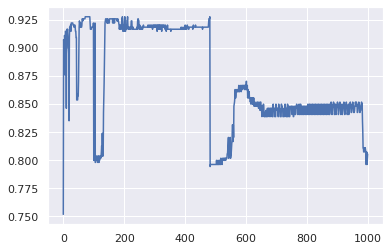

In [40]:
perceptron = Perceptron()
perceptron.fit(X_train_Normalized,Y_train, 1000)


In [41]:
Y_pred_test = perceptron.predict(X_test_Normalized)
print(accuracy_score(Y_pred_test,Y_test))

0.8275862068965517


## Checkpoints

We observe that the accuracy of the model keep oscillating

But it reached a better value than the value at the last epoch.

Now we will implement Checkpointing at max accuracy to avoid this problem

In [42]:
  class Perceptron:

    def __init__(self):                                                         #initialising w and b
      self.w = None
      self.b = None

    def model(self, x):
      return 1 if(np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
      Y = []
      for x in X:
        result = self.model(x)
        Y.append(result)
      return np.array(Y)  
    
    def fit(self, X, Y, epochs = 1):

      self.w = np.ones(X.shape[1])
      self.b = 0

      accuracy_perceptron = []
      max_accuracy_perceptron =  0                                              # For calculating max accuracy

      for i in range(epochs):
        for x, y in zip(X, Y):
            y_pred = self.model(x)
            if y == 1 and y_pred == 0:
              self.w = self.w + x                                                   
              self.b = self.b -1
            elif y == 0 and y_pred == 1:
              self.w = self.w - x
              self.b = self.b + 1

        accuracy_perceptron.append(accuracy_score(self.predict(X),Y))
        if(accuracy_perceptron[i] > max_accuracy_perceptron):                      # Updating max accuracy
          max_accuracy_perceptron = accuracy_perceptron[i]
          chkpt_w = self.w
          chkpt_b = self.b

      self.w = chkpt_w
      self.b = chkpt_b
      print('Maximum Accuracy = ', max_accuracy_perceptron)

      plt.plot(accuracy_perceptron)
      plt.show() 

Maximum Accuracy =  0.9277777777777778


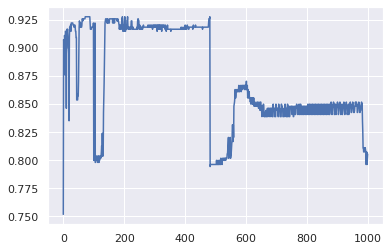

In [43]:
perceptron = Perceptron()
perceptron.fit(X_train_Normalized,Y_train, 1000)

In [44]:
Y_pred_test = perceptron.predict(X_test_Normalized)
print(accuracy_score(Y_pred_test,Y_test))

0.896551724137931


## Learning rate

As we can see that the acccuracy is oscillating this may sometimes lead divergence. To prevent that we multiply the $X$ with a constant between $[0,1]$ to smoothen the curve. This constant is called as **Learning Rate.** 

In [52]:
  class Perceptron:

    def __init__(self):                                                         #initialising w and b
      self.w = None
      self.b = None

    def model(self, x):
      return 1 if(np.dot(self.w, x) >= self.b) else 0

    def predict(self, X):
      Y = []
      for x in X:
        result = self.model(x)
        Y.append(result)
      return np.array(Y)  
    
    def fit(self, X, Y, epochs = 1, lr = 1):

      self.w = np.ones(X.shape[1])
      self.b = 0

      accuracy_perceptron = []
      max_accuracy_perceptron =  0                                              # For calculating max accuracy

      for i in range(epochs):
        for x, y in zip(X, Y):
            y_pred = self.model(x)
            if y == 1 and y_pred == 0:
              self.w = self.w + lr * x                                               #lr is learning rate    
              self.b = self.b - lr * 1
            elif y == 0 and y_pred == 1:
              self.w = self.w - lr * x
              self.b = self.b + lr * 1

        accuracy_perceptron.append(accuracy_score(self.predict(X),Y))
        if(accuracy_perceptron[i] > max_accuracy_perceptron):                      # Updating max accuracy
          max_accuracy_perceptron = accuracy_perceptron[i]
          chkpt_w = self.w
          chkpt_b = self.b

      self.w = chkpt_w
      self.b = chkpt_b
      

      plt.plot(accuracy_perceptron)
      plt.ylim([0,1])
      plt.show() 
      print('Maximum Accuracy = ', max_accuracy_perceptron)

Maximum Accuracy =  0.9314814814814815


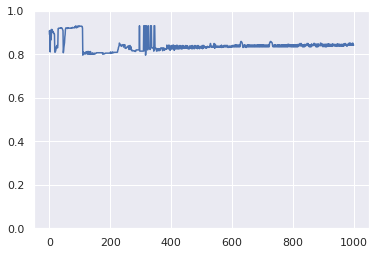

In [46]:
perceptron = Perceptron()
perceptron.fit(X_train_Normalized,Y_train, 1000, .1)

Though the accuraccy is still oscillating. The value of accuracy did not change drastically and the max accuracy is higher for the same number of epochs. This is because as the learning rate is reduced $W$ found a better value which was earlier skipped by the learning algorithm due large step size.

#**Hyper Parameters**

The parameter which indirectly affect the model's accuracy is called as hyperparameter. We have already seen two hyperparameters:

1. Number of Epochs

2. Learning rate

These parameters are often set manually by experience and guessing. There is no generalized rule to decide the values of these parameters. 

* Though we can conclude that increasing epochs will give better accuracy. But after certain number of epochs the change in maximum accuracy is not significant or no change at all. But making the model run for these many epochs increase the computing time.

* In case of learning rate decreasing the learing rate too much may lead to lesser accuracy also.



In [48]:
import time

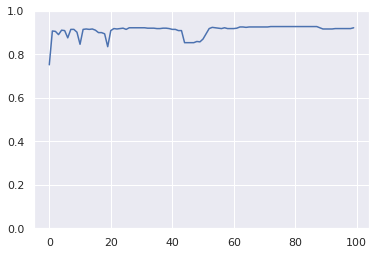

Maximum Accuracy =  0.9277777777777778
Test accuracy =  0.896551724137931

Time consumed =  0.49364376068115234


In [63]:
perceptron = Perceptron()
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100, 1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

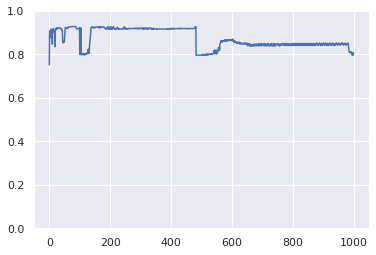

Maximum Accuracy =  0.9277777777777778
Test accuracy =  0.896551724137931

Time consumed =  2.8260200023651123


In [64]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 1000, 1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

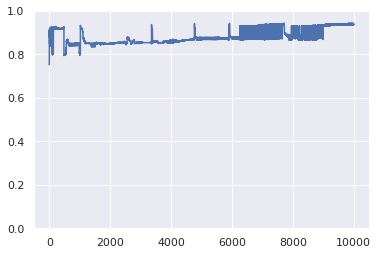

Maximum Accuracy =  0.9444444444444444
Test accuracy =  0.9310344827586207

Time consumed =  26.42925190925598


In [66]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 10000, 1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)


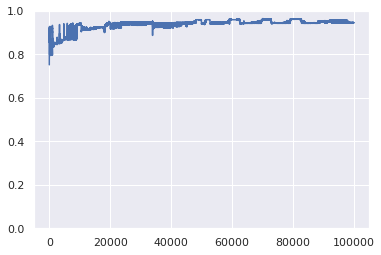

Maximum Accuracy =  0.9648148148148148
Test accuracy =  0.9655172413793104

Time consumed =  254.67061471939087


In [67]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100000, 1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

Though the accuracy increases but the time it taken increases significantly. So choose the number of epochs according to the need.

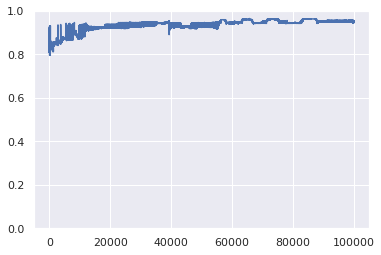

Maximum Accuracy =  0.9648148148148148
Time consumed =  239.16428446769714
Test accuracy =  0.9310344827586207

Time consumed =  239.16428446769714


In [69]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100000, 0.1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

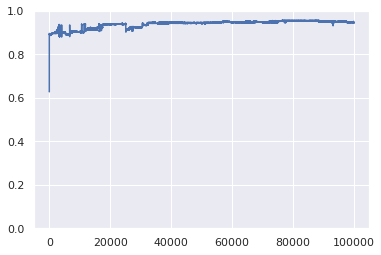

Maximum Accuracy =  0.9574074074074074
Time consumed =  236.33842062950134
Test accuracy =  0.9310344827586207

Time consumed =  236.33842062950134


In [70]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100000, 0.001)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

We can see that the model has better accuracy for lr = 1 and slightly less for lr =  0.1, and significantly lesser for lr = 0.001.

But decreasing lr is advantageous when the number epochs is lesses

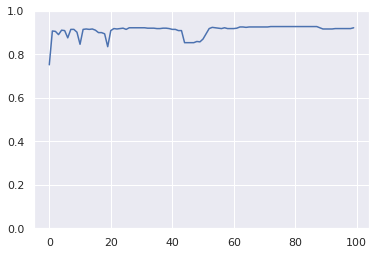

Maximum Accuracy =  0.9277777777777778
Test accuracy =  0.896551724137931

Time consumed =  0.49135899543762207


In [72]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100, 1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

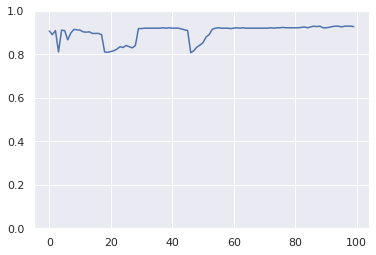

Maximum Accuracy =  0.9296296296296296
Test accuracy =  0.896551724137931

Time consumed =  0.4729588031768799


In [73]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100, 0.1)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

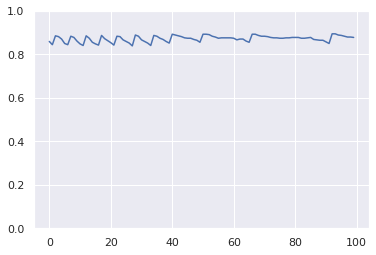

Maximum Accuracy =  0.8944444444444445
Test accuracy =  0.896551724137931

Time consumed =  0.47399306297302246


In [74]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100, 0.01)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

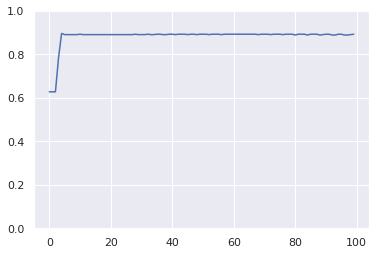

Maximum Accuracy =  0.8962962962962963
Test accuracy =  0.896551724137931

Time consumed =  0.5636796951293945


In [75]:
tic = time.time()
perceptron.fit(X_train_Normalized,Y_train, 100, 0.001)
toc = time.time()
Y_pred_test = perceptron.predict(X_test_Normalized)
print('Test accuracy = ',accuracy_score(Y_pred_test,Y_test))
print('')
print('Time consumed = ',toc - tic)

We can see that the model with lesser lr is more consistent.